In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [2]:
t_pit16=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv",encoding='utf-8',engine='python')
t_pit17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv",encoding='utf-8',engine='python')
t_pit18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv",encoding='utf-8',engine='python')
t_pit19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv",encoding='utf-8',engine='python')

In [3]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

In [4]:
#이닝수 변수 만들기
t_pit16['INN']=t_pit16['INN2']/3
t_pit17['INN']=t_pit17['INN2']/3
t_pit18['INN']=t_pit18['INN2']/3
t_pit19['INN']=t_pit19['INN2']/3

In [5]:
#1루타 변수 만들기
t_pit16['H1']=t_pit16['HIT']-t_pit16['H2']-t_pit16['H3']-t_pit16['HR']
t_pit17['H1']=t_pit17['HIT']-t_pit17['H2']-t_pit17['H3']-t_pit17['HR']
t_pit18['H1']=t_pit18['HIT']-t_pit18['H2']-t_pit18['H3']-t_pit18['HR']
t_pit19['H1']=t_pit19['HIT']-t_pit19['H2']-t_pit19['H3']-t_pit19['HR']

## 2. train test 셋 만들기

In [6]:
team=['HH', 'HT', 'KT', 'LG', 'LT', 'NC', 'OB', 'SK', 'SS', 'WO']

In [7]:
pd.set_option('mode.chained_assignment',  None) #chain copy warning 제거하기

#승률 변수만들기(이긴 경기, 진 경기 합치기)
def make_win_lose(data):
    data['W']=0; data['L']=0
    data['W'][data['WLS']=='W']=1
    data['L'][data['WLS']=='L']=1
    return data

In [8]:
data_list=[t_pit16,t_pit17,t_pit18,t_pit19]
for data in data_list:
    data=make_win_lose(data)

In [9]:
stats=['T_ID', 'HOLD', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'R','ER', 'P_WHIP_RT', 'CB_WHIP_RT', 'INN', 'H1','W','L']
t16=t_pit16.filter(stats)
t17=t_pit17.filter(stats)
t18=t_pit18.filter(stats)
t19=t_pit19.filter(stats)

In [10]:
#정답 셋과 train 셋 만드는 함수
t_bat=[t16,t17,t18,t19]
def make_answer_train(year):
    a=t_bat[year-2016]  
    data=pd.DataFrame()  #빈 데이터프레임 만들기
    pa=pd.DataFrame()

    train_name=['train' + str(i) for i in range(1,6)]
    train_data=[pd.DataFrame() for var in train_name] #50경기씩 묶일 데이터셋
    
    ans_name=['ans' + str(i) for i in range(1,6)]
    answer=[pd.DataFrame() for var in ans_name]  #20경기씩 묶일 데이터셋
        
    for i in range(5):
        tra=train_data[i]
        ans=answer[i]
        for t in team:
            tra=pd.concat([tra,a[a['T_ID']==t][4+i*20:4+40+i*20]])
            ans=pd.concat([ans,a[a['T_ID']==t][4+40+i*20:4+60+i*20]])
        
        tra=tra.groupby(['T_ID']).sum()
        #SLG변수 만들기
        tra['SLG']=(tra['H1']+tra['H2']*2+tra['H3']*3+tra['HR']*4)/tra['AB']
        tra=tra.drop(['H1','H2','H3','HR'],axis='columns')
        
        #승률 변수 만들기
        tra['WINNING_RATE']=tra['W']/(tra['W']+tra['L'])
        tra=tra.drop(['W','L'],axis='columns')

        #팀별 AB,HIT합 구하기
        ans=ans.groupby(['T_ID']).sum()
        ans['ERA']=ans['ER']*9/ans['INN']     #방어율 계산
        ans=ans.drop(ans.columns[list(range(16))],axis='columns')
                
        if i <4:
            data=pd.concat([data,pd.merge(tra,ans,on='T_ID')])
        else:
            test_data=pd.merge(tra,ans,on='T_ID')
            
    return data,test_data

In [11]:
train16,test16=make_answer_train(2016)
train17,test17=make_answer_train(2017)
train18,test18=make_answer_train(2018)
train19,test19=make_answer_train(2019)

In [15]:
train19

,HOLD,BF,PA,AB,HIT,R,ER,P_WHIP_RT,CB_WHIP_RT,INN,SLG,WINNING_RATE,ERA
T_ID,,,,,,,,,,,,,
HH,11,6069,1571,1387,407,213,196,76.198760,75.471487,351.000000,0.426099,0.475000,3.194085
HT,13,6298,1633,1405,412,243,225,75.819156,84.885606,351.666667,0.441993,0.307692,3.146617
KT,14,5757,1545,1341,360,207,185,67.874467,66.601840,350.666667,0.404922,0.400000,5.338403
LG,15,5764,1513,1333,314,159,136,46.156277,55.195088,357.333333,0.333083,0.550000,2.815642
LT,13,6428,1677,1424,410,241,219,87.172994,87.255519,355.666667,0.421348,0.375000,5.575526
NC,19,6085,1578,1398,366,196,176,64.485498,67.490951,360.666667,0.395565,0.550000,3.775862
OB,16,5647,1502,1346,348,137,125,39.329100,62.002056,354.666667,0.366270,0.650000,3.425373
SK,24,6074,1582,1422,384,168,156,57.074767,66.025491,364.000000,0.386076,0.692308,2.808394
SS,14,6045,1574,1381,362,204,177,73.816717,76.620771,358.333333,0.389573,0.375000,3.400000


In [16]:
train678_9=pd.concat([train16,test16,train17,test17,train18,test18,train19])
train679_8=pd.concat([train16,test16,train17,test17,train19,test19,train18])
train689_7=pd.concat([train16,test16,train18,test18,train19,test19,train17])
train789_6=pd.concat([train17,test17,train18,test18,train19,test19,train16])

## 3. 모델학습

In [17]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [18]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
var=['HOLD', 'BF', 'PA', 'AB', 'HIT', 'R', 'ER', 'P_WHIP_RT', 'CB_WHIP_RT','INN', 'SLG','WINNING_RATE']

In [20]:
X_cols=var
Y_col=['ERA']

In [21]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=100, learning_rate=0.05 ,max_depth=3, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'reg':LinearRegression(),
    'ridge':Ridge(alpha=100,normalize=True),
    'lasso':Lasso(alpha=0.05,normalize=True)}  #변수 자동 채택 / 많은 변수를 다룰때 활용

train678_9
train679_8
train689_7
train789_6

In [39]:
train=train789_6
test=test16

In [40]:
X_train = train[X_cols]; Y_train = train[Y_col]
X_test = test[X_cols]; Y_test = test[Y_col]
diff=[]

#모델 여러개 돌려보기
model_list=['xgb','lgbm','rf','svr','reg','ridge','lasso']

for m in model_list:
    model = model_dict[m]
    if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
    model.fit(X_train, Y_train)  #, sample_weight=weight
    Y_predict = model.predict(X_test)

    r2=r2_score(Y_test, Y_predict)

    a=Y_test.assign(predict=Y_predict)
    a['diff']=a['ERA']-a['predict']
    print(m,"\t>r2 :", r2,'\ttrain점수 :{:.3f}'.format(model.score(X_train,Y_train)),"\t차이합 :",abs(a['diff']).sum())
    diff.append(r2)

xgb 	>r2 : 0.18668913067408577 	train점수 :0.742 	차이합 : 6.553624922438242
lgbm 	>r2 : 0.26091847309367067 	train점수 :0.854 	차이합 : 5.8230731954448025
rf 	>r2 : 0.10682848049251226 	train점수 :0.879 	차이합 : 6.600176921998271
svr 	>r2 : -0.016333925442893804 	train점수 :0.067 	차이합 : 6.96627331874208
reg 	>r2 : 0.4303264643864686 	train점수 :0.242 	차이합 : 5.504826882003725
ridge 	>r2 : 0.012124771578864713 	train점수 :0.017 	차이합 : 7.0243495896447286
lasso 	>r2 : -0.011687621363460243 	train점수 :0.000 	차이합 : 7.121443776557756


In [110]:
#model = model_dict[model_list[diff.index(max(diff))]]  #r2가 가장 큰 모델 돌리기
model=model_dict['rf']                                  #rf 돌리기
if m=='rf': Y_train=Y_train.values.ravel()  #rf에서의 오류 없애기 위함
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(model_list[diff.index(max(diff))])

lasso


### 예측값과 실제값 차이

Text(0,0.5,'예측 값')

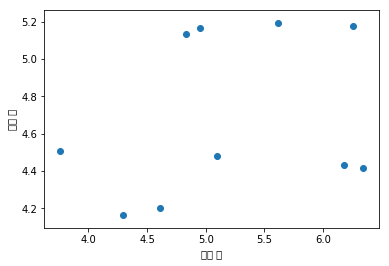

In [111]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [112]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['diff']=a['ERA']-a['predict']
a

,ERA,predict,diff
T_ID,,,
HH,4.950000,5.166561,-0.216561
HT,4.608534,4.201366,0.407168
KT,5.612360,5.194457,0.417902
LG,5.094340,4.483088,0.611251
LT,3.762712,4.509822,-0.747110
NC,6.178378,4.431942,1.746436
OB,4.297753,4.162851,0.134901
SK,4.834286,5.135047,-0.300761
SS,6.257299,5.178712,1.078588


In [113]:
#차이 합
abs(a['diff']).sum()

7.580002756274246